In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

About Dataset
Context
This dataset (FinancialPhraseBank) contains the sentiments for financial news headlines from the perspective of a retail investor.

Content
The dataset contains two columns, "Sentiment" and "News Headline". The sentiment can be negative, neutral or positive.

Acknowledgements
Malo, P., Sinha, A., Korhonen, P., Wallenius, J., & Takala, P. (2014). Good debt or bad debt: Detecting semantic orientations in economic texts. Journal of the Association for Information Science and Technology, 65(4), 782-796.



This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. Further details about the dataset can be found in: Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2014): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology.

https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

In [2]:
df = pd.read_csv('all-data.csv',delimiter=',',encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [3]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

In [4]:
df

,sentiment,Message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [5]:
df.shape

(4845, 2)

In [6]:
# Check for missing data
df.isnull().sum()

sentiment    0
Message      0
dtype: int64

In [7]:
# drop missing rows
df.dropna(axis=0, inplace=True)

In [8]:
df.index = range(4845)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111964

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   Message    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [10]:
df['sentiment'].value_counts()
#0 positive
#1 netural

neutral     2878
positive    1363
negative     604
Name: sentiment, dtype: int64

In [11]:
#VISUALIZING THE DATA

C:\Users\sarja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


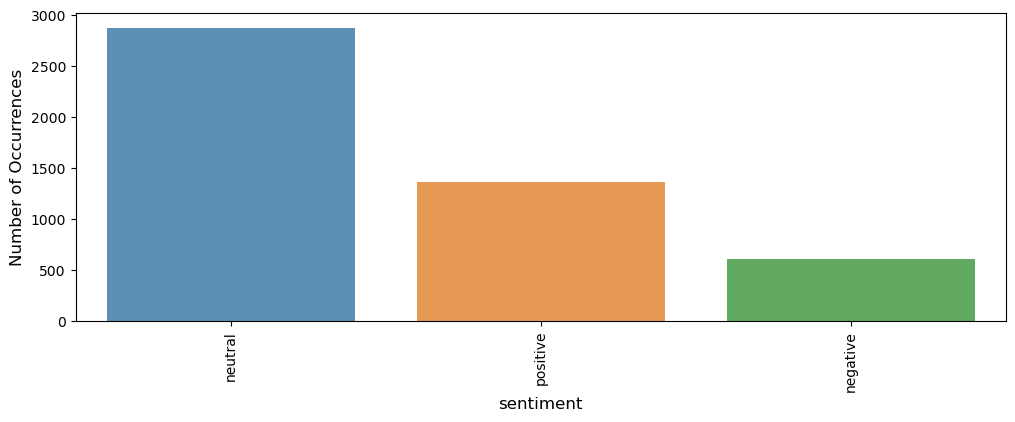

In [12]:
cnt_pro = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [13]:
#Convert sting to numeric
sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

df.sentiment = [sentiment[item] for item in df.sentiment] 
print(df)

      sentiment                                            Message
0             1  Technopolis plans to develop in stages an area...
1             2  The international electronic industry company ...
2             0  With the new production plant the company woul...
3             0  According to the company 's updated strategy f...
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...         ...                                                ...
4840          2  LONDON MarketWatch -- Share prices ended lower...
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...
4843          2  Net sales of the Paper segment decreased to EU...
4844          2  Sales in Finland decreased by 10.5 % in Januar...

[4845 rows x 2 columns]


<AxesSubplot:ylabel='sentiment'>

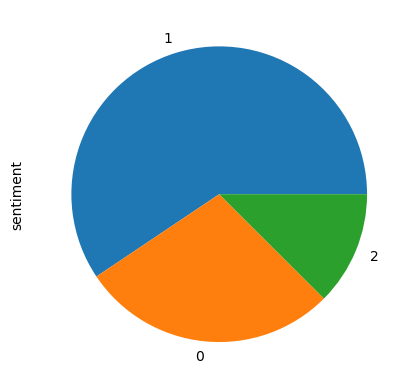

In [14]:
df['sentiment'].value_counts().plot(kind='pie')

Data Preprocessing

In [15]:
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def headline_to_words(headline):
    ''' Convert headline text into a sequence of words '''
    
    # convert to lowercase
    text = headline.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal headline ->", df['Message'][0])
print("\nProcessed headline ->", headline_to_words(df['Message'][0]))


Original headline -> Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .

Processed headline -> ['technopoli', 'plan', 'develop', 'stage', 'area', 'less', '100', '000', 'squar', 'meter', 'order', 'host', 'compani', 'work', 'comput', 'technolog', 'telecommun', 'statement', 'said']


In [17]:
# Apply data processing to each headline
X = list(map(headline_to_words, df['Message']))

Vectorization

Bag of words

In [18]:
import collections
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
CountVec = CountVectorizer(ngram_range=(1,1),  stop_words='english')
Count_data = CountVec.fit_transform(df['Message'])
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

      00  000  000063  002  0025  003  0030  007  008  01  ...  ænnen  ænsi  \
0      0    1       0    0     0    0     0    0    0   0  ...      0     0   
1      0    0       0    0     0    0     0    0    0   0  ...      0     0   
2      0    0       0    0     0    0     0    0    0   0  ...      0     0   
3      0    0       0    0     0    0     0    0    0   0  ...      0     0   
4      0    0       0    0     0    0     0    0    0   0  ...      0     0   
...   ..  ...     ...  ...   ...  ...   ...  ...  ...  ..  ...    ...   ...   
4840   0    0       0    0     0    0     0    0    0   0  ...      0     0   
4841   0    0       0    0     0    0     0    0    0   0  ...      0     0   
4842   0    0       0    0     0    0     0    0    0   0  ...      0     0   
4843   0    0       0    0     0    0     0    0    0   0  ...      0     0   
4844   0    0       0    0     0    0     0    0    0   0  ...      0     0   

      ærnits  ærtsil  ærvi  ærvinen  æsein  æskyl  

C:\Users\sarja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer()
corpus = df['Message']
result = tfidf.fit_transform(corpus)
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)

C:\Users\sarja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



idf values:
00 : 6.350414685447321
000 : 4.332617306878692
000063 : 8.792761720816525
002 : 8.792761720816525
0025 : 8.792761720816525
003 : 8.792761720816525
0030 : 8.792761720816525
007 : 8.792761720816525
008 : 8.792761720816525
01 : 6.920959543914934
0101138 : 8.792761720816525
012 : 8.099614540256582
0187274 : 8.792761720816525
019 : 8.792761720816525
02 : 7.2886843240402515
023 : 8.792761720816525
027 : 8.792761720816525
029 : 8.792761720816525
03 : 7.088013628578101
030 : 8.792761720816525
031 : 8.792761720816525
035 : 8.792761720816525
04 : 7.088013628578101
045 : 8.099614540256582
046 : 8.792761720816525
047 : 8.792761720816525
0491 : 8.792761720816525
05 : 7.406467359696635
050 : 8.792761720816525
052 : 8.792761720816525
06 : 7.183323808382426
060 : 8.792761720816525
063 : 8.387296612708361
064 : 8.792761720816525
067 : 8.792761720816525
07 : 7.539998752321158
070 : 8.792761720816525
0711 : 8.792761720816525
0762 : 8.792761720816525
08 : 7.2886843240402515
083 : 8.7927617208

weight : 8.387296612708361
weighted : 8.792761720816525
welcome : 7.088013628578101
welcomes : 8.792761720816525
welding : 8.387296612708361
welfare : 8.792761720816525
well : 4.794561019147327
wellbeing : 8.792761720816525
wellingborough : 8.792761720816525
wellmont : 8.792761720816525
wellness : 8.387296612708361
welsh : 8.792761720816525
wenchong : 8.792761720816525
went : 6.394866448018155
were : 4.69011835577973
west : 7.539998752321158
westend : 8.792761720816525
westerlund : 8.387296612708361
western : 7.406467359696635
westpac : 8.387296612708361
westphalia : 8.792761720816525
westward : 8.792761720816525
wet : 7.694149432148416
what : 6.71332017913669
wheat : 8.792761720816525
when : 5.657267504887376
where : 6.0201729985767445
whereas : 8.792761720816525
whereby : 7.406467359696635
wherever : 8.792761720816525
whether : 7.876470988942371
which : 4.110630493692306
while : 5.209242782360416
whilst : 8.387296612708361
white : 7.694149432148416
whitefield : 8.792761720816525
whit

#bigram

In [22]:
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk import ngrams

In [23]:
# Function to create bigrams from a given text
def create_bigrams(text):
    tokens = text.split()
    bigrams = ngrams(tokens, 2)
    return [' '.join(bigram) for bigram in bigrams]

# Apply the function to the "text" column and create a new column with the bigrams
df['bigrams'] = df['Message'].apply(create_bigrams)

# Output the resulting DataFrame
print(df)

      sentiment                                            Message  \
0             1  Technopolis plans to develop in stages an area...   
1             2  The international electronic industry company ...   
2             0  With the new production plant the company woul...   
3             0  According to the company 's updated strategy f...   
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...   
...         ...                                                ...   
4840          2  LONDON MarketWatch -- Share prices ended lower...   
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...   
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...   
4843          2  Net sales of the Paper segment decreased to EU...   
4844          2  Sales in Finland decreased by 10.5 % in Januar...   

                                                bigrams  
0     [Technopolis plans, plans to, to develop, deve...  
1     [The international, international ele

trigram

In [24]:
# Function to create trigrams from a given text
def create_trigrams(text):
    tokens = text.split()
    trigrams = ngrams(tokens, 3)
    return [' '.join(trigram) for trigram in trigrams]

# Apply the function to the "text" column and create a new column with the bigrams
df['trigrams'] = df['Message'].apply(create_trigrams)

# Output the resulting DataFrame
print(df)

      sentiment                                            Message  \
0             1  Technopolis plans to develop in stages an area...   
1             2  The international electronic industry company ...   
2             0  With the new production plant the company woul...   
3             0  According to the company 's updated strategy f...   
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...   
...         ...                                                ...   
4840          2  LONDON MarketWatch -- Share prices ended lower...   
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...   
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...   
4843          2  Net sales of the Paper segment decreased to EU...   
4844          2  Sales in Finland decreased by 10.5 % in Januar...   

                                                bigrams  \
0     [Technopolis plans, plans to, to develop, deve...   
1     [The international, international e

In [25]:
df['trigrams'][1]

['The international electronic',
 'international electronic industry',
 'electronic industry company',
 'industry company Elcoteq',
 'company Elcoteq has',
 'Elcoteq has laid',
 'has laid off',
 'laid off tens',
 'off tens of',
 'tens of employees',
 'of employees from',
 'employees from its',
 'from its Tallinn',
 'its Tallinn facility',
 'Tallinn facility ;',
 'facility ; contrary',
 '; contrary to',
 'contrary to earlier',
 'to earlier layoffs',
 'earlier layoffs the',
 'layoffs the company',
 'the company contracted',
 'company contracted the',
 'contracted the ranks',
 'the ranks of',
 'ranks of its',
 'of its office',
 'its office workers',
 'office workers ,',
 'workers , the',
 ', the daily',
 'the daily Postimees',
 'daily Postimees reported',
 'Postimees reported .']

In [26]:
#vector embedding

In [27]:
# Function to remove punctuation
def remove_punctuations(text):
    import string
    text = " ".join(df['Message'])
    text_filtered = text.translate(str.maketrans('','',string.punctuation))
    return text_filtered

# Apply the function to the "text" column and create a new column with the bigrams
df['remove_punch'] = df['Message'].apply(remove_punctuations)

# Output the resulting DataFrame
print(df)


      sentiment                                            Message  \
0             1  Technopolis plans to develop in stages an area...   
1             2  The international electronic industry company ...   
2             0  With the new production plant the company woul...   
3             0  According to the company 's updated strategy f...   
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...   
...         ...                                                ...   
4840          2  LONDON MarketWatch -- Share prices ended lower...   
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...   
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...   
4843          2  Net sales of the Paper segment decreased to EU...   
4844          2  Sales in Finland decreased by 10.5 % in Januar...   

                                                bigrams  \
0     [Technopolis plans, plans to, to develop, deve...   
1     [The international, international e

In [28]:
from nltk import word_tokenize
from nltk.corpus import stopwords

In [29]:
# Function to remove stopwords
def remove_stopwords(text):
    stopwords = stopwords.words('english')
    tokens = word_tokenize(text_filtered)
    word_filtered = [w.lower() for w in tokens if w not in stopwords]
    return text_filtered

# Apply the function to the "text" column and create a new column with the bigrams
df['remove_stopwords'] = df['Message'].apply(remove_punctuations)

# Output the resulting DataFrame
print(df)


      sentiment                                            Message  \
0             1  Technopolis plans to develop in stages an area...   
1             2  The international electronic industry company ...   
2             0  With the new production plant the company woul...   
3             0  According to the company 's updated strategy f...   
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...   
...         ...                                                ...   
4840          2  LONDON MarketWatch -- Share prices ended lower...   
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...   
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...   
4843          2  Net sales of the Paper segment decreased to EU...   
4844          2  Sales in Finland decreased by 10.5 % in Januar...   

                                                bigrams  \
0     [Technopolis plans, plans to, to develop, deve...   
1     [The international, international e

In [39]:
word_filtered = df['remove_stopwords']

In [40]:
counter_dict = nltk.FreqDist(word_filtered)

In [41]:
print(word_filtered[:100])

0     Technopolis plans to develop in stages an area...
1     Technopolis plans to develop in stages an area...
2     Technopolis plans to develop in stages an area...
3     Technopolis plans to develop in stages an area...
4     Technopolis plans to develop in stages an area...
                            ...                        
95    Technopolis plans to develop in stages an area...
96    Technopolis plans to develop in stages an area...
97    Technopolis plans to develop in stages an area...
98    Technopolis plans to develop in stages an area...
99    Technopolis plans to develop in stages an area...
Name: remove_stopwords, Length: 100, dtype: object


In [42]:
#create a list containing 3000 most frequent words in documents
word_features = [w[0] for w in counter_dict.most_common(3000)]

In [43]:
word_features

['Technopolis plans to develop in stages an area of no less than 100000 square meters in order to host companies working in computer technologies and telecommunications  the statement said  The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility  contrary to earlier layoffs the company contracted the ranks of its office workers  the daily Postimees reported  With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability  According to the company s updated strategy for the years 20092012  Basware targets a longterm net sales growth in the range of 20  40  with an operating profit margin of 10  20  of net sales  FINANCING OF ASPOCOMP S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs  For the 

In [44]:
counter_dict = nltk.FreqDist(word_filtered)

In [45]:
print(counter_dict.most_common(15))

[('Technopolis plans to develop in stages an area of no less than 100000 square meters in order to host companies working in computer technologies and telecommunications  the statement said  The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility  contrary to earlier layoffs the company contracted the ranks of its office workers  the daily Postimees reported  With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability  According to the company s updated strategy for the years 20092012  Basware targets a longterm net sales growth in the range of 20  40  with an operating profit margin of 10  20  of net sales  FINANCING OF ASPOCOMP S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs  For the

In [46]:
len(df['Message'])

4845

Model building process and results interpretation and comparison

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(df["Message"]).toarray()

In [48]:
y = df['sentiment']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [50]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3876, 5000) (3876,)
(969, 5000) (969,)


In [51]:
cv.get_feature_names()[:10]

C:\Users\sarja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000 euro',
 '000 euro mln',
 '000 for',
 '000 for the',
 '000 from',
 '000 in',
 '000 in the',
 '000 new']

In [52]:
# Scikit-learn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [53]:
# Build Models

models = {
    MultinomialNB():'Multinomial Naive Bayes',
    LogisticRegression(max_iter=300):'Logistic Regression',
    SVC(C=1.0, kernel='linear', degree=3, gamma='auto'):"Support Vector Machine"
}
for m in models.keys():
    m.fit(X_train,y_train)

In [54]:
# Check Accuracy for each model
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Multinomial Naive Bayes is :  71.10423116615067 %
Accuracy Score for Logistic Regression is :  75.54179566563467 %
Accuracy Score for Support Vector Machine is :  69.5562435500516 %
